In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import os

# Path to your folder containing CSV files
folder_path = '/content/drive/My Drive/data'

# List to store individual DataFrames
dataframes = []

# Loop through each file in the folder
for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path, file)
        # Read each CSV file into a DataFrame and append it to the list
        df = pd.read_csv(file_path, skiprows=2)
        dataframes.append(df)

# Concatenate all the DataFrames into one
data = pd.concat(dataframes, ignore_index=True)

# Display or manipulate final_dataframe
print(data)


        Year  Month  Day  Hour  Minute  Temperature  Clearsky DHI  \
0       1999      1    1     0       0         -5.2             0   
1       1999      1    1     0      30         -5.4             0   
2       1999      1    1     1       0         -5.7             0   
3       1999      1    1     1      30         -5.8             0   
4       1999      1    1     2       0         -6.0             0   
...      ...    ...  ...   ...     ...          ...           ...   
437995  2018     12   31    21      30          7.2            24   
437996  2018     12   31    22       0          7.3             0   
437997  2018     12   31    22      30          7.4             0   
437998  2018     12   31    23       0          7.5             0   
437999  2018     12   31    23      30          7.5             0   

        Clearsky DNI  Clearsky GHI  Cloud Type  ...  GHI  Relative Humidity  \
0                  0             0           1  ...    0              72.05   
1            

In [ ]:
data.head(5)

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,Global Horizontal UV Irradiance (280-400nm),Global Horizontal UV Irradiance (295-385nm)
0,1999,1,1,0,0,-5.2,0,0,0,1,...,0,72.05,113.78,0.12,1018,0.5,252,1.2,0.0,0.0
1,1999,1,1,0,30,-5.4,0,0,0,1,...,0,73.15,119.51,0.12,1018,0.5,253,1.3,0.0,0.0
2,1999,1,1,1,0,-5.7,0,0,0,1,...,0,74.09,125.29,0.12,1018,0.5,254,1.3,0.0,0.0
3,1999,1,1,1,30,-5.8,0,0,0,1,...,0,74.65,131.09,0.12,1018,0.5,256,1.4,0.0,0.0
4,1999,1,1,2,0,-6.0,0,0,0,1,...,0,75.67,136.87,0.12,1018,0.5,257,1.4,0.0,0.0


In [ ]:
data.shape

(438000, 24)

In [ ]:
data.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', 'DHI', 'DNI',
       'Fill Flag', 'GHI', 'Relative Humidity', 'Solar Zenith Angle',
       'Surface Albedo', 'Pressure', 'Precipitable Water', 'Wind Direction',
       'Wind Speed', 'Global Horizontal UV Irradiance (280-400nm)',
       'Global Horizontal UV Irradiance (295-385nm)'],
      dtype='object')

In [ ]:
# Summary statistics
print(data.describe())

                Year          Month            Day           Hour  \
count  438000.000000  438000.000000  438000.000000  438000.000000   
mean     2010.000000       6.526027      15.720548      11.500000   
std         7.211111       3.447855       8.796257       6.922194   
min      1998.000000       1.000000       1.000000       0.000000   
25%      2004.000000       4.000000       8.000000       5.750000   
50%      2010.000000       7.000000      16.000000      11.500000   
75%      2016.000000      10.000000      23.000000      17.250000   
max      2022.000000      12.000000      31.000000      23.000000   

              Minute    Temperature   Clearsky DHI   Clearsky DNI  \
count  438000.000000  438000.000000  438000.000000  438000.000000   
mean       15.000000      13.215044      50.607064     331.162708   
std        15.000017      10.507439      64.261604     369.641038   
min         0.000000     -18.000000       0.000000       0.000000   
25%         0.000000       4.4000

In [ ]:
# Keep only the specified columns
columns_to_keep = ['Day','Year','Month','Hour','Minute', 'Temperature', 'Dew Point', 'Wind Speed', 'Clearsky GHI','Cloud Type', 'Precipitable Water', 'Relative Humidity','Solar Zenith Angle','Pressure','GHI']
data = data[columns_to_keep]

In [ ]:
# Count NaN values in the entire DataFrame
data.isna().sum()


,0
Day,0
Year,0
Month,0
Hour,0
Minute,0
Temperature,0
Dew Point,0
Wind Speed,0
Clearsky GHI,0
Cloud Type,0


In [ ]:
data.shape

(438000, 15)

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

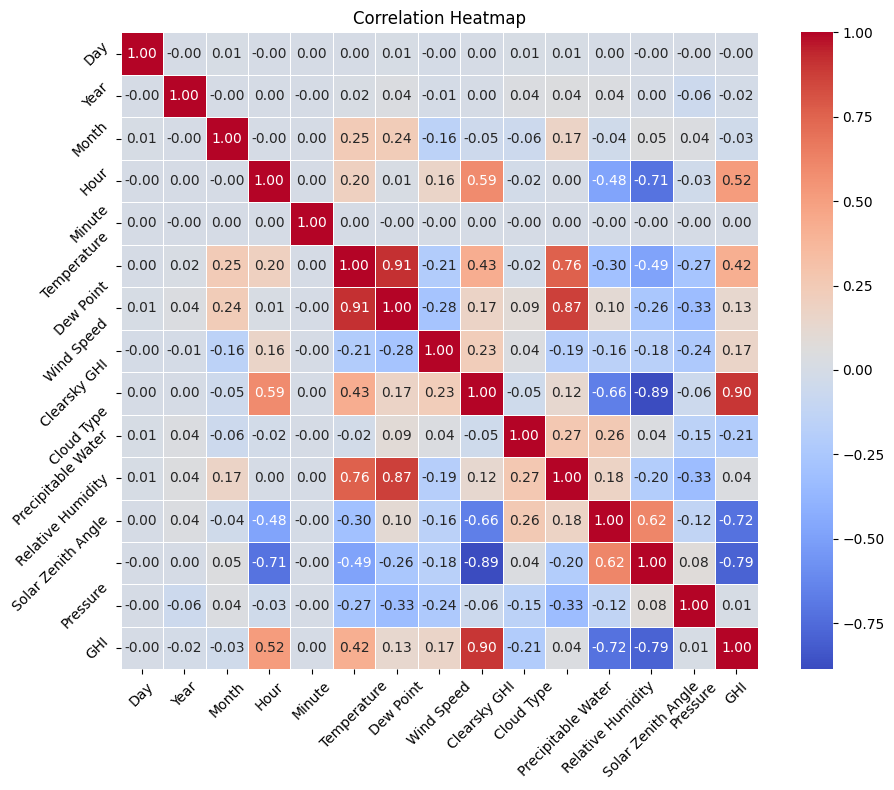

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=.5)

# Add titles and labels
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()  # Adjust the layout to make room for labels

# Show the heatmap
plt.show()


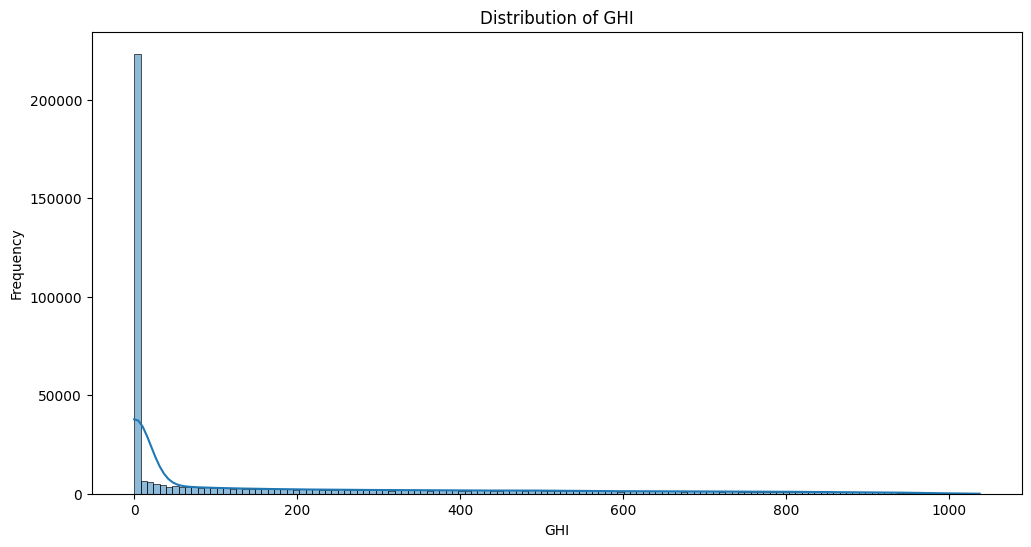

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data['GHI'], kde=True)
plt.title('Distribution of GHI')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import pandas as pd
monthly_ghi_df = data.groupby(data['Month'])['GHI'].mean().reset_index()
monthly_ghi_df

,Month,GHI
0,1,87.691962
1,2,123.799851
2,3,169.067608
3,4,213.449472
4,5,237.829167
5,6,265.559417
6,7,265.561263
7,8,234.008414
8,9,189.769639
9,10,138.441613


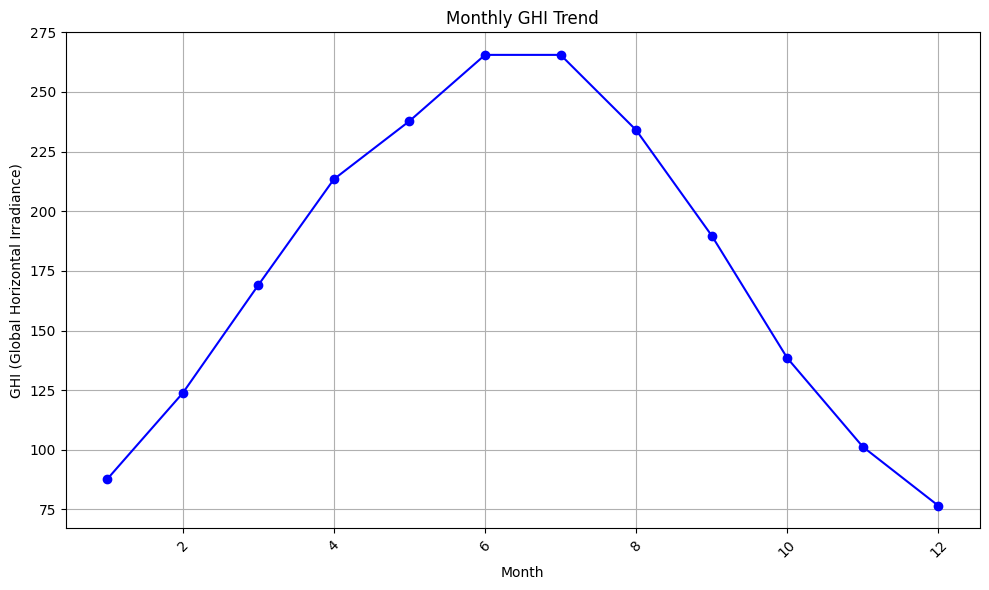

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Avg. GHI Generated per year
plt.figure(figsize=(10, 6))
plt.plot(monthly_ghi_df.Month, monthly_ghi_df.GHI, marker='o', linestyle='-', color='b')
plt.title('Monthly GHI Trend')
plt.xlabel('Month')
plt.ylabel('GHI (Global Horizontal Irradiance)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd



# Define a function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Created a new column 'Season' by applying the mapping function
data['Season'] = data['Month'].apply(get_season)

# Group by 'Season' and sum the GHI values
seasonal_ghi_df = data.groupby('Season')['GHI'].mean().reset_index()

# Display the result
print(seasonal_ghi_df)


   Season         GHI
0    Fall  143.098306
1  Spring  206.709611
2  Summer  254.928723
3  Winter   95.075824


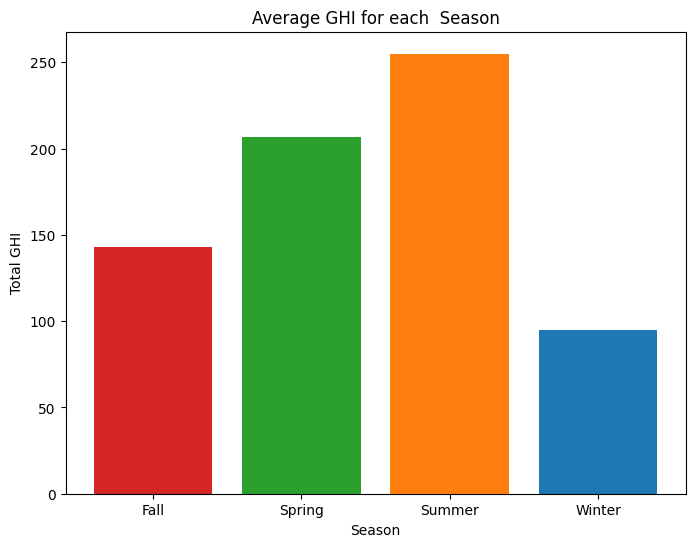

In [ ]:
import matplotlib.pyplot as plt

# Define colors for each season
season_colors = {
    'Winter': '#1f77b4',  # blue
    'Spring': '#2ca02c',  # green
    'Summer': '#ff7f0e',  # orange
    'Fall': '#d62728'     # red
}

# Total GHI per season
plt.figure(figsize=(8, 6))
plt.bar(seasonal_ghi_df['Season'], seasonal_ghi_df['GHI'],
        color=[season_colors[season] for season in seasonal_ghi_df['Season']])
plt.xlabel('Season')
plt.ylabel('Total GHI')
plt.title('Average GHI for each  Season')
plt.show()


In [ ]:
hourly_ghi_df = data.groupby(data['Hour'])['GHI'].mean().reset_index()
hourly_ghi_df

,Hour,GHI
0,0,3.543178
1,1,0.000000
2,2,0.000000
3,3,0.000000
4,4,0.000000
5,5,0.000000
6,6,0.000000
7,7,0.000000
8,8,0.000000
9,9,0.000000


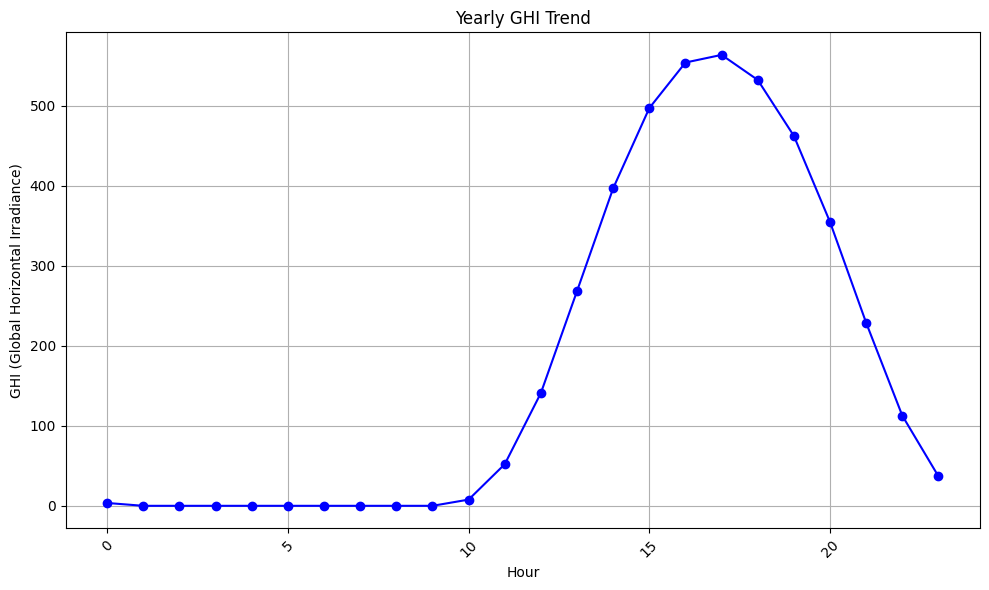

In [ ]:


# Avg. GHI Generated per hour
plt.figure(figsize=(10, 6))
plt.plot(hourly_ghi_df.Hour, hourly_ghi_df.GHI, marker='o', linestyle='-', color='b')
plt.title('Yearly GHI Trend')
plt.xlabel('Hour')
plt.ylabel('GHI (Global Horizontal Irradiance)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
temp_ghi_df = data.groupby(data['Temperature'])['GHI'].mean().reset_index()
temp_ghi_df

,Temperature,GHI
0,-18.0,0.0
1,-17.8,0.0
2,-17.7,0.0
3,-17.6,0.0
4,-17.5,0.0
...,...,...
572,39.7,642.0
573,39.8,819.0
574,39.9,716.0
575,40.0,767.5


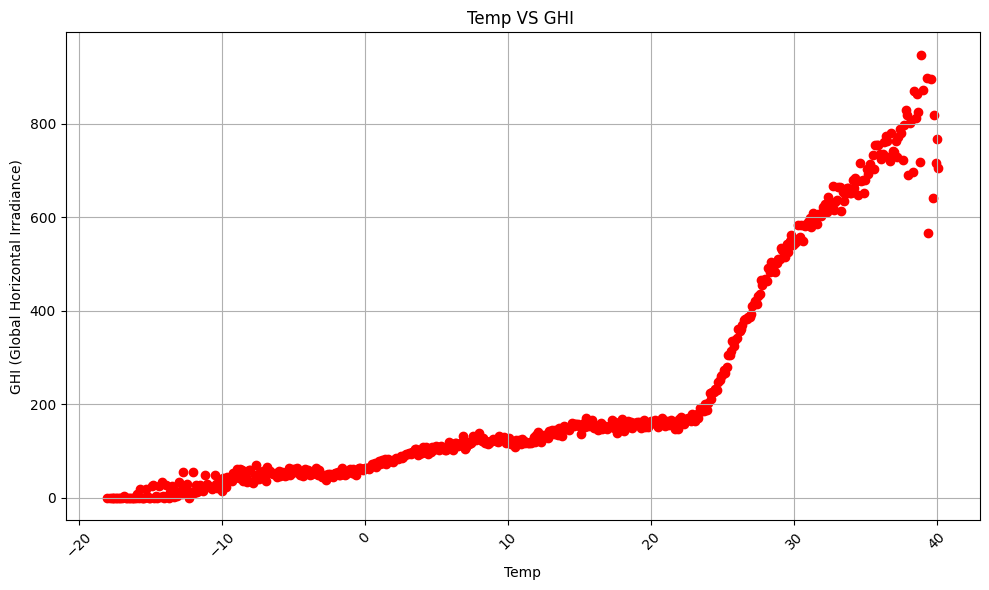

In [ ]:
 #Avg. GHI Generated per hour
plt.figure(figsize=(10, 6))
plt.scatter(temp_ghi_df.Temperature, temp_ghi_df.GHI, marker='o', color='r')
plt.title('Temp VS GHI ')
plt.xlabel('Temp')
plt.ylabel('GHI (Global Horizontal Irradiance)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
data

,Day,Year,Month,Hour,Minute,Temperature,Dew Point,Wind Speed,Clearsky GHI,Cloud Type,Precipitable Water,Relative Humidity,Solar Zenith Angle,Pressure,GHI,Season
0,1,1999,1,0,0,-5.2,-9.5,1.2,0,1,0.5,72.05,113.78,1018,0,Winter
1,1,1999,1,0,30,-5.4,-9.5,1.3,0,1,0.5,73.15,119.51,1018,0,Winter
2,1,1999,1,1,0,-5.7,-9.6,1.3,0,1,0.5,74.09,125.29,1018,0,Winter
3,1,1999,1,1,30,-5.8,-9.6,1.4,0,1,0.5,74.65,131.09,1018,0,Winter
4,1,1999,1,2,0,-6.0,-9.6,1.4,0,1,0.5,75.67,136.87,1018,0,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437995,31,2018,12,21,30,7.2,6.7,3.2,31,4,3.1,96.32,86.79,1015,4,Winter
437996,31,2018,12,22,0,7.3,6.9,3.3,0,7,3.2,97.24,91.99,1015,0,Winter
437997,31,2018,12,22,30,7.4,6.9,3.3,0,7,3.3,96.49,97.20,1014,0,Winter
437998,31,2018,12,23,0,7.5,7.1,3.3,0,7,3.5,97.14,102.58,1013,0,Winter


In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
# One-hot encode the season variable
season_encoder = OneHotEncoder()
season_encoded = season_encoder.fit_transform(data[['Season']])

# Convert the encoded season array into a DataFrame and concatenate with the main data
season_encoded_df = pd.DataFrame(season_encoded.toarray(), index=data.index, columns=season_encoder.get_feature_names_out(['Season']))
data = pd.concat([data.drop(['Season'], axis=1), season_encoded_df], axis=1)





In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Separate the features and target before scaling
features = data.drop(columns=['GHI'])  # replace 'target_variable' with the actual column name
target = data['GHI']
# Initialize the scaler and scale only the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
# Recombine scaled features and target for the LSTM model
scaled_data = np.concatenate([scaled_features, target.values.reshape(-1, 1)], axis=1)
# Define a function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, :-1])  # All features except the target
        y.append(data[i, -1])  # Target variable (GHI)
    return np.array(X), np.array(y)

# Set the sequence length (e.g., past 24 hours for hourly data)
sequence_length = 24
X, y = create_sequences(scaled_data, sequence_length)

# Split data into training and testing sets (80% training, 20% testing)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (350380, 24, 18)
Test data shape: (87596, 24, 18)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)  # Output layer for predicting GHI
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 24, 50)              │          13,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,301 (137.89 KB)

 Trainable params: 35,301 (137.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 292s 26ms/step - loss: 24237.3086 - val_loss: 4583.3989
Epoch 2/20
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 315s 26ms/step - loss: 5128.1245 - val_loss: 4044.0244
Epoch 3/20
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 323s 26ms/step - loss: 4710.8691 - val_loss: 4034.2913
Epoch 4/20
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 283s 26ms/step - loss: 4538.0972 - val_loss: 4268.0537
Epoch 5/20
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 322s 26ms/step - loss: 4457.9194 - val_loss: 3916.2661
Epoch 6/20
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 318s 25ms/step - loss: 4389.4819 - val_loss: 3938.6521
Epoch 7/20
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 309s 24ms/step - loss: 4335.1660 - val_loss: 3831.8396
Epoch 8/20
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 332s 25ms/step - loss: 4241.3018 - val_loss: 3960.6909
Epoch 9/20
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 318s 25ms/step - loss: 4220.4507 - val_loss: 3796.5625
Epoch 10/20
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 320s 25ms/step - loss: 4163.8735 - val_loss: 3826.7388
Epoch 11

In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error
# Make predictions on the test set
y_pred = model.predict(X_test)

# Rescale predictions and actual values back to original scale if needed
y_test_rescaled = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_test.reshape(-1, 1)), axis=1))[:, -1]
y_pred_rescaled = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_pred), axis=1))[:, -1]

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


2738/2738 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step
Root Mean Squared Error (RMSE): 63.94925666967286
Mean Absolute Error (MAE): 28.952986002635225


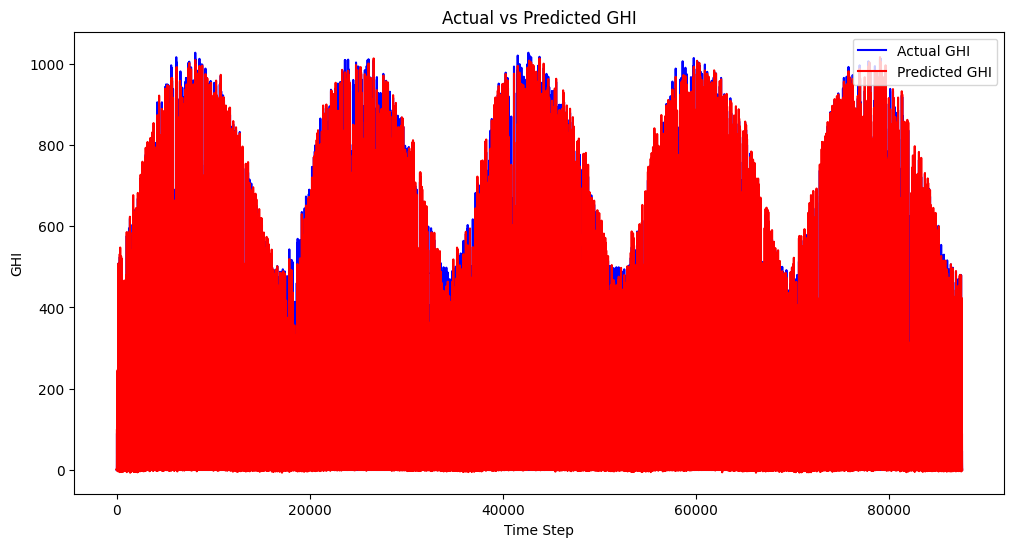

In [ ]:
# Inverse scale predictions and actual values

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual GHI', color='blue')
plt.plot(y_pred_rescaled, label='Predicted GHI', color='red')
plt.title('Actual vs Predicted GHI')
plt.xlabel('Time Step')
plt.ylabel('GHI')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt


# Select relevant features and target
features = data.drop(columns=['GHI'])  # replace 'target_variable' with the actual column name
target = data['GHI']

# Scale features and target separately
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

scaled_features = scaler_features.fit_transform(features)
scaled_target = scaler_target.fit_transform(target.values.reshape(-1, 1))

# Train-test split (80% train, 20% test)
train_size = int(len(scaled_features) * 0.8)
X_train, X_test = scaled_features[:train_size], scaled_features[train_size:]
y_train, y_test = scaled_target[:train_size], scaled_target[train_size:]

# Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Predict and rescale predictions and actual values to original scale
y_pred = model.predict(X_test)
y_pred_rescaled = scaler_target.inverse_transform(y_pred)
y_test_rescaled = scaler_target.inverse_transform(y_test)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)

print("ANN Root Mean Squared Error (RMSE):", rmse)
print("ANN Mean Absolute Error (MAE):", mae)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual")
plt.plot(y_pred_rescaled, label="Predicted")
plt.legend()
plt.title("ANN Predictions vs. Actual Values")
plt.show()


In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima
import matplotlib.pyplot as plt



target = data['GHI']

# Stationarity check and differencing if needed
# Differencing to remove trend if the series is non-stationary
target_diff = target.diff().dropna()

# Automatic order selection for ARIMA
auto_model = auto_arima(target_diff, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
print("Optimal parameters (p, d, q):", auto_model.order)




Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=4883440.529, Time=139.46 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4944024.170, Time=5.54 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4935825.592, Time=6.30 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4938265.064, Time=28.19 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=4896721.267, Time=36.34 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4899124.076, Time=78.89 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=4881907.995, Time=165.83 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=4897097.429, Time=88.95 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=4880069.039, Time=302.57 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=4896164.006, Time=57.40 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=inf, Time=363.76 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=4881910.580, Time=299.74 sec


In [ ]:
# Train-test split (adjust as needed)
train_size = int(len(target) * 0.8)
train, test = target[:train_size], target[train_size:]

# Fit the ARIMA model on training data with the optimal order
model = ARIMA(train, order=auto_model.order)
model_fit = model.fit()

# Forecast on test data
forecast = model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)

print("ARIMA Root Mean Squared Error (RMSE):", rmse)
print("ARIMA Mean Absolute Error (MAE):", mae)



In [ ]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(forecast, label="ARIMA Forecast")
plt.legend()
plt.show()